In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import suitcase.hdf5 as sc
from databroker import db, get_table
import pandas as pd

In [22]:
# fluorescence detector, for hxn and srx
from hxntools.handlers import register
register()

# Define run number and header information

In [7]:
hdr = db[13123]

In [10]:
print(hdr)


header
  
  EventDescriptor
  ---------------
  configuration   :
        zpssy_motor_egu : 1471886218.67                           
        zpssy_motor_egu : um                                      
          dtype           : string                                  
          upper_ctrl_limit: None                                    
          source          : PV:XF:03IDC-ES{Ppmac:1-zpssy}Mtr.EGU    
          shape           : []                                      
          units           : None                                    
          lower_ctrl_limit: None                                    
        zpssx_motor_egu : 1471886218.67                           
        zpssx_motor_egu : um                                      
          dtype           : string                                  
          upper_ctrl_limit: None                                    
          source          : PV:XF:03IDC-ES{Ppmac:1-zpssx}Mtr.EGU    
          shape           : []              

In [8]:
d = get_table(hdr)

In [23]:
d

,time,merlin1_stats1_cursor_x,merlin1_stats1_cursor_y,merlin1_stats1_nd_attributes_file,t_hlens,Det1_Ti_sum,Det1_Gd_sum,Det2_Gd_sum,merlin1_stats1_centroid_threshold,merlin1_stats1_bayer_pattern,...,Det3_S_sum,xspress3_ch2,merlin1_stats1_min_value,merlin1_stats1_pool_max_buffers,Det2_Ni,Det1_P_sum,merlin1_stats1_profile_centroid_x,merlin1_stats1_profile_centroid_y,merlin1_stats1_pool_free_buffers,merlin1_stats1_dimensions
1,2016-08-22 17:17:02-04:00,256,256,,24.876,8.052124,10.065156,5.043186,1.0,0,...,388276.069755,33b090e1-052b-4716-9140-aa16af686726,0.0,0,2.017274,861.577317,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
2,2016-08-22 17:17:04-04:00,256,256,,24.876,13.083160,17.108606,8.067358,1.0,0,...,388276.069755,7967c2d2-789e-4de9-9f19-beaf67e533dd,0.0,0,6.048344,1715.847219,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,2016-08-22 17:17:05-04:00,256,256,,24.877,21.134454,20.127841,17.144748,1.0,0,...,388276.069755,41af2a6e-485a-4b3e-909d-75e9a098aa1e,0.0,0,4.034396,2610.547167,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4,2016-08-22 17:17:06-04:00,256,256,,24.876,25.159359,23.146520,23.193784,1.0,0,...,388276.069755,858feab0-c2e1-48af-8d35-d17edc9cb12c,0.0,0,2.016345,3477.914230,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
5,2016-08-22 17:17:08-04:00,256,256,,24.876,32.202847,27.171370,30.249930,1.0,0,...,388276.069755,7ae432ea-b199-465e-b1a7-e2fc0788089f,0.0,0,2.016042,4351.306743,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
6,2016-08-22 17:17:09-04:00,256,256,,24.876,43.277214,35.225456,35.295287,1.0,0,...,388276.069755,14d22ae3-5657-46c2-8d2c-21ef376ec5c5,0.0,0,5.045357,5242.289956,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
7,2016-08-22 17:17:10-04:00,256,256,,24.876,57.367460,39.251240,41.345446,1.0,0,...,388276.069755,61513396-bac6-4326-a92f-9681205508a7,0.0,0,6.050159,6150.104388,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
8,2016-08-22 17:17:12-04:00,256,256,,24.875,61.393932,42.271094,51.432519,1.0,0,...,388276.069755,841297be-dc16-4a1f-a53a-a0bc60ead964,0.0,0,2.017415,7058.073713,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
9,2016-08-22 17:17:14-04:00,256,256,,24.875,66.428199,48.312214,57.486891,1.0,0,...,388276.069755,94237f08-54d9-48a0-8811-e6e0919fce0e,0.0,0,4.036248,7908.864794,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
10,2016-08-22 17:17:15-04:00,256,256,,24.875,73.473252,54.350831,60.511742,1.0,0,...,388276.069755,7ca40321-d029-4079-9fb2-9c068a290e08,0.0,0,3.024852,8817.676711,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"


In [34]:
for v in d.keys():
    print(v)

time
merlin1_stats1_cursor_x
merlin1_stats1_cursor_y
merlin1_stats1_nd_attributes_file
t_hlens
Det1_Ti_sum
Det1_Gd_sum
Det2_Gd_sum
merlin1_stats1_centroid_threshold
merlin1_stats1_bayer_pattern
Det3_Zn
Det2_Zn_sum
Det1_Zn
t_sample
Det1_Cr
merlin1_stats1_ts_mean_value
merlin1_stats1_array_counter
merlin1_stats1_asyn_io
zpssx_user_setpoint
merlin1_stats1_ts_control
merlin1_stats1_centroid_x
merlin1_stats1_dim2_sa
Det1_Co_sum
Det1_S_sum
Det2_Ag_sum
merlin1_stats1_ts_sigma_xy
merlin1_stats1_ts_min_value
Det3_Cr_sum
xspress3_ch3
Det3_Co
Det3_Ga_sum
merlin1_stats1_blocking_callbacks
merlin1_stats1_compute_profiles
merlin1_stats1_queue_use_high
Det2_Te
Det3_Cu
Det2_Ti
Det1_Te_sum
merlin1_stats1_ts_min_y
merlin1_stats1_width
merlin1_stats1_compute_statistics
Det3_Ag_sum
Det1_Te
merlin1_stats1_profile_cursor_x
merlin1_stats1_profile_cursor_y
Det3_Te
xspress3_channel2_rois_num_rois
Det1_Si
merlin1_stats1_ts_read
Det3_Ti
Det1_V_sum
Det2_Te_sum
xspress3_channel3_rois_num_rois
Det2_V_sum
Det2_K
mer

<IPython.core.display.Javascript object>


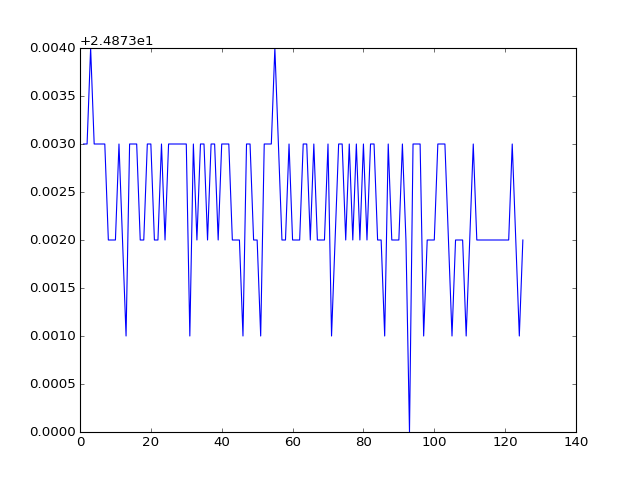

In [28]:
fig, ax = plt.subplots()
ax.plot(d['t_hlens'])

# Save scaler data to CSV file

In [29]:
d.to_csv('data.csv')

In [30]:
ls

data.csv  suitcase_demo.ipynb


In [18]:
csv_data = pd.read_csv('data.csv')

In [21]:
csv_data

,Unnamed: 0,time,merlin1_stats1_cursor_x,merlin1_stats1_cursor_y,merlin1_stats1_nd_attributes_file,t_hlens,Det1_Ti_sum,Det1_Gd_sum,Det2_Gd_sum,merlin1_stats1_centroid_threshold,...,Det3_S_sum,xspress3_ch2,merlin1_stats1_min_value,merlin1_stats1_pool_max_buffers,Det2_Ni,Det1_P_sum,merlin1_stats1_profile_centroid_x,merlin1_stats1_profile_centroid_y,merlin1_stats1_pool_free_buffers,merlin1_stats1_dimensions
0,1,2016-08-22 17:17:02-04:00,256,256,NaN,24.876,8.052124,10.065156,5.043186,1.0,...,388276.069755,33b090e1-052b-4716-9140-aa16af686726,0.0,0,2.017274,861.577317,[ 0.],[ 0.],1,[1 1 0 0 0 0 0 0 0 0]
1,2,2016-08-22 17:17:04-04:00,256,256,NaN,24.876,13.083160,17.108606,8.067358,1.0,...,388276.069755,7967c2d2-789e-4de9-9f19-beaf67e533dd,0.0,0,6.048344,1715.847219,[ 0.],[ 0.],1,[1 1 0 0 0 0 0 0 0 0]
2,3,2016-08-22 17:17:05-04:00,256,256,NaN,24.877,21.134454,20.127841,17.144748,1.0,...,388276.069755,41af2a6e-485a-4b3e-909d-75e9a098aa1e,0.0,0,4.034396,2610.547167,[ 0.],[ 0.],1,[1 1 0 0 0 0 0 0 0 0]
3,4,2016-08-22 17:17:06-04:00,256,256,NaN,24.876,25.159359,23.146520,23.193784,1.0,...,388276.069755,858feab0-c2e1-48af-8d35-d17edc9cb12c,0.0,0,2.016345,3477.914230,[ 0.],[ 0.],1,[1 1 0 0 0 0 0 0 0 0]
4,5,2016-08-22 17:17:08-04:00,256,256,NaN,24.876,32.202847,27.171370,30.249930,1.0,...,388276.069755,7ae432ea-b199-465e-b1a7-e2fc0788089f,0.0,0,2.016042,4351.306743,[ 0.],[ 0.],1,[1 1 0 0 0 0 0 0 0 0]
5,6,2016-08-22 17:17:09-04:00,256,256,NaN,24.876,43.277214,35.225456,35.295287,1.0,...,388276.069755,14d22ae3-5657-46c2-8d2c-21ef376ec5c5,0.0,0,5.045357,5242.289956,[ 0.],[ 0.],1,[1 1 0 0 0 0 0 0 0 0]
6,7,2016-08-22 17:17:10-04:00,256,256,NaN,24.876,57.367460,39.251240,41.345446,1.0,...,388276.069755,61513396-bac6-4326-a92f-9681205508a7,0.0,0,6.050159,6150.104388,[ 0.],[ 0.],1,[1 1 0 0 0 0 0 0 0 0]
7,8,2016-08-22 17:17:12-04:00,256,256,NaN,24.875,61.393932,42.271094,51.432519,1.0,...,388276.069755,841297be-dc16-4a1f-a53a-a0bc60ead964,0.0,0,2.017415,7058.073713,[ 0.],[ 0.],1,[1 1 0 0 0 0 0 0 0 0]
8,9,2016-08-22 17:17:14-04:00,256,256,NaN,24.875,66.428199,48.312214,57.486891,1.0,...,388276.069755,94237f08-54d9-48a0-8811-e6e0919fce0e,0.0,0,4.036248,7908.864794,[ 0.],[ 0.],1,[1 1 0 0 0 0 0 0 0 0]
9,10,2016-08-22 17:17:15-04:00,256,256,NaN,24.875,73.473252,54.350831,60.511742,1.0,...,388276.069755,7ca40321-d029-4079-9fb2-9c068a290e08,0.0,0,3.024852,8817.676711,[ 0.],[ 0.],1,[1 1 0 0 0 0 0 0 0 0]


# Use export function to output all the data into h5 file

In [44]:
sc.export?

### output all the data

In [50]:
fname = 'data_13123.h5'
sc.export(hdr, fname, use_uid=False)

In [19]:
# if the file already exists, we need to remove it
!rm data_13123_1.h5

### output data with selected fields

In [13]:
fds = ['xspress3_ch1', 'xspress3_ch2', 'xspress3_ch3']

In [20]:
fname = 'data_13123_1.h5'
sc.export(hdr, fname, fields=fds, use_uid=False)

### output data by excluding certain fields

In [21]:
tmp = ['xspress3_ch1']
fname = 'data_13123_2.h5'
fds = sc.filter_fields(hdr, tmp)
sc.export(hdr, fname, fields=fds, use_uid=False)